In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow.keras
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
from scipy import signal
from scipy.signal import find_peaks, peak_prominences
from scipy.io import wavfile
from scipy import signal, interpolate
from scipy.interpolate import splrep, splev
import joblib
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

# Data load

Lucas = pd.read_csv("C:/Users/user/Desktop/인공지능 CPR/Beat2Beat_Data/Valid_Lucas_Error_Delete_2.csv",dtype = 'float')#1


In [2]:
Lucas.shape

(4727, 25)

In [3]:
Input_Data_Beat2Beat = np.vstack([Lucas])

In [4]:
Input_Data_Beat2Beat.shape

(4727, 25)

In [5]:
len(Input_Data_Beat2Beat)

4727

In [6]:
print(Input_Data_Beat2Beat.shape)

(4727, 25)


In [7]:
Total_Input_signal = Input_Data_Beat2Beat

In [8]:
print(Total_Input_signal.shape)

(4727, 25)


In [9]:
print("Depth: Max= ",max(Total_Input_signal[:,0]),"Min = ",min(Total_Input_signal[:,0]))
print("Rate: Max= ",max(Total_Input_signal[:,1]),"Min = ",min(Total_Input_signal[:,1]))
print("ABP Systolic: Max= ",max(Total_Input_signal[:,2]),"Min = ",min(Total_Input_signal[:,2]))
print("ABP Diastolic: Max= ",max(Total_Input_signal[:,3]),"Min = ",min(Total_Input_signal[:,3]))
print("CVP Systolic: Max= ",max(Total_Input_signal[:,4]),"Min = ",min(Total_Input_signal[:,4]))
print("CVP Diastolic: Max= ",max(Total_Input_signal[:,5]),"Min = ",min(Total_Input_signal[:,5]))
print("PPG Systolic: Max= ",max(Total_Input_signal[:,6]),"Min = ",min(Total_Input_signal[:,6]))
print("PPG Diastolic: Max= ",max(Total_Input_signal[:,7]),"Min = ",min(Total_Input_signal[:,7]))
print("ETCo2: Max= ",max(Total_Input_signal[:,8]),"Min = ",min(Total_Input_signal[:,8]))
print("ITP Peak: Max= ",max(Total_Input_signal[:,9]),"Min = ",min(Total_Input_signal[:,9]))
print("MAP: Max= ",max(Total_Input_signal[:,10]),"Min = ",min(Total_Input_signal[:,10]))
print("ABP Area: Max= ",max(Total_Input_signal[:,11]),"Min = ",min(Total_Input_signal[:,11]))
print("CVP Area: Max= ",max(Total_Input_signal[:,12]),"Min = ",min(Total_Input_signal[:,12]))
print("PPG Area: Max= ",max(Total_Input_signal[:,13]),"Min = ",min(Total_Input_signal[:,13]))
print("Mean ABP: Max= ",max(Total_Input_signal[:,14]),"Min = ",min(Total_Input_signal[:,14]))
print("ABP Difference: Max= ",max(Total_Input_signal[:,15]),"Min = ",min(Total_Input_signal[:,15]))
print("CVP Difference: Max= ",max(Total_Input_signal[:,16]),"Min = ",min(Total_Input_signal[:,16]))
print("PPG Difference: Max= ",max(Total_Input_signal[:,17]),"Min = ",min(Total_Input_signal[:,17]))
print("ABP Time Difference: Max= ",max(Total_Input_signal[:,18]),"Min = ",min(Total_Input_signal[:,18]))
print("CVP Time Difference: Max= ",max(Total_Input_signal[:,19]),"Min = ",min(Total_Input_signal[:,19]))
print("PPG Time Difference: Max= ",max(Total_Input_signal[:,20]),"Min = ",min(Total_Input_signal[:,20]))
print("Coronary Perfusion Pressure1 : Max= ",max(Total_Input_signal[:,21]),"Min = ",min(Total_Input_signal[:,21]))
print("Coronary Perfusion Pressure2: Max= ",max(Total_Input_signal[:,22]),"Min = ",min(Total_Input_signal[:,22]))
print("Coronary Perfusion Pressure3: Max= ",max(Total_Input_signal[:,23]),"Min = ",min(Total_Input_signal[:,23]))
print("Carotid Volume: Max= ",max(Total_Input_signal[:,24]),"Min = ",min(Total_Input_signal[:,24]))

Depth: Max=  5.0 Min =  5.0
Rate: Max=  100.0 Min =  100.0
ABP Systolic: Max=  368.248311825279 Min =  35.4477784200666
ABP Diastolic: Max=  43.148435025594 Min =  -56.9655177067553
CVP Systolic: Max=  357.108375985774 Min =  12.072939693998
CVP Diastolic: Max=  11.201996095897 Min =  -19.8917604137829
PPG Systolic: Max=  0.0361704762680939 Min =  -0.0058188094980577
PPG Diastolic: Max=  0.0488259008230161 Min =  -0.0011867468739715
ETCo2: Max=  42.4294563097724 Min =  5.15407828667294
ITP Peak: Max=  1.97779140246642 Min =  -0.0639515219775661
MAP: Max=  110.68306845908 Min =  10.683075060074
ABP Area: Max=  154.155545929159 Min =  15.2490579019512
CVP Area: Max=  174.729593861127 Min =  8.82147837163213
PPG Area: Max=  0.0014270151115014 Min =  -0.0019276500860247
Mean ABP: Max=  130.099524720997 Min =  13.0141149237101
ABP Difference: Max=  386.347865049299 Min =  35.3469700866599
CVP Difference: Max=  355.316998155374 Min =  18.0190442815001
PPG Difference: Max=  0.0167616409710602

In [10]:
# 0~7 Normalize 필요

def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

Depth_Feature= np.append(Total_Input_signal[:,0],np.array([6,5]))
Rate_Feature= np.append(Total_Input_signal[:,1],np.array([120,100]))

SABP_Feature= np.append(Total_Input_signal[:,2],np.array([470,10]))
DABP_Feature= np.append(Total_Input_signal[:,3],np.array([60,-60]))

SCVP_Feature= np.append(Total_Input_signal[:,4],np.array([410,10]))
DCVP_Feature= np.append(Total_Input_signal[:,5],np.array([50,-20]))

SPPG_Feature= np.append(Total_Input_signal[:,6],np.array([0.05,-0.01]))
DPPG_Feature= np.append(Total_Input_signal[:,7],np.array([0.05,-0.01]))

ETmax = np.append(Total_Input_signal[:,8],np.array([50,5]))

ITPmax = np.append(Total_Input_signal[:,9],np.array([2,-0.1]))

MAP = np.append(Total_Input_signal[:,10],np.array([130,-10]))

ABP_Area = np.append(Total_Input_signal[:,11],np.array([200,10]))

CVP_Area = np.append(Total_Input_signal[:,12],np.array([200,2.5]))

PPG_Area = np.append(Total_Input_signal[:,13],np.array([2,-2]))

Mean_ABP = np.append(Total_Input_signal[:,14],np.array([140,0.7]))

ABP_Difference = np.append(Total_Input_signal[:,15],np.array([400,20]))

CVP_Difference = np.append(Total_Input_signal[:,16],np.array([420,0]))

PPG_Difference = np.append(Total_Input_signal[:,17],np.array([0.05,-0.1]))

ABP_Time_Difference = np.append(Total_Input_signal[:,18],np.array([3,0]))

CVP_Time_Difference = np.append(Total_Input_signal[:,19],np.array([3,0]))

PPG_Time_Difference = np.append(Total_Input_signal[:,20],np.array([1,0]))

Coronary_Perfusion_Pressure1 = np.append(Total_Input_signal[:,21],np.array([300,-200]))

Coronary_Perfusion_Pressure2 = np.append(Total_Input_signal[:,22],np.array([60,-60]))

Coronary_Perfusion_Pressure3 = np.append(Total_Input_signal[:,23],np.array([150,-40]))

In [11]:
Depth_Feature = np.delete(min_max_normalize(np.array(Depth_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
Rate_Feature = np.delete(min_max_normalize(np.array(Rate_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
SABP_Feature = np.delete(min_max_normalize(np.array(SABP_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
DABP_Feature = np.delete(min_max_normalize(np.array(DABP_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
SCVP_Feature = np.delete(min_max_normalize(np.array(SCVP_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
DCVP_Feature = np.delete(min_max_normalize(np.array(DCVP_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
SPPG_Feature = np.delete(min_max_normalize(np.array(SPPG_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
DPPG_Feature = np.delete(min_max_normalize(np.array(DPPG_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
ETmax = np.delete(min_max_normalize(np.array(ETmax)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
ITPmax = np.delete(min_max_normalize(np.array(ITPmax)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
MAP = np.delete(min_max_normalize(np.array(MAP)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
ABP_Area = np.delete(min_max_normalize(np.array(ABP_Area)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
CVP_Area = np.delete(min_max_normalize(np.array(CVP_Area)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
PPG_Area = np.delete(min_max_normalize(np.array(PPG_Area)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
Mean_ABP = np.delete(min_max_normalize(np.array(Mean_ABP)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
ABP_Difference = np.delete(min_max_normalize(np.array(ABP_Difference)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
CVP_Difference = np.delete(min_max_normalize(np.array(CVP_Difference)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
PPG_Difference  = np.delete(min_max_normalize(np.array(PPG_Difference)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
ABP_Time_Difference = np.delete(min_max_normalize(np.array(ABP_Time_Difference)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
CVP_Time_Difference = np.delete(min_max_normalize(np.array(CVP_Time_Difference)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
PPG_Time_Difference = np.delete(min_max_normalize(np.array(PPG_Time_Difference)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
Coronary_Perfusion_Pressure1 = np.delete(min_max_normalize(np.array(Coronary_Perfusion_Pressure1)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
Coronary_Perfusion_Pressure2 = np.delete(min_max_normalize(np.array(Coronary_Perfusion_Pressure2)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
Coronary_Perfusion_Pressure3 = np.delete(min_max_normalize(np.array(Coronary_Perfusion_Pressure3)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))

In [12]:
Total_Input_signal[:,0] = Depth_Feature
Total_Input_signal[:,1] = Rate_Feature 
Total_Input_signal[:,2] = SABP_Feature
Total_Input_signal[:,3] = DABP_Feature
Total_Input_signal[:,4] = SCVP_Feature
Total_Input_signal[:,5] = DCVP_Feature
Total_Input_signal[:,6] = SPPG_Feature
Total_Input_signal[:,7] = DPPG_Feature
Total_Input_signal[:,8] = ETmax
Total_Input_signal[:,9] = ITPmax
Total_Input_signal[:,10] = MAP
Total_Input_signal[:,11] = ABP_Area
Total_Input_signal[:,12] = CVP_Area
Total_Input_signal[:,13] = PPG_Area
Total_Input_signal[:,14] = Mean_ABP
Total_Input_signal[:,15] = ABP_Difference
Total_Input_signal[:,16] = CVP_Difference
Total_Input_signal[:,17] = PPG_Difference
Total_Input_signal[:,18] = ABP_Time_Difference
Total_Input_signal[:,19] = CVP_Time_Difference
Total_Input_signal[:,20] = PPG_Time_Difference
Total_Input_signal[:,21] = Coronary_Perfusion_Pressure1
Total_Input_signal[:,22] = Coronary_Perfusion_Pressure2
Total_Input_signal[:,23] = Coronary_Perfusion_Pressure3

In [13]:
Total_Input_signal = pd.DataFrame(Total_Input_signal)

In [14]:
# Rosc 0 평균 Beat Carotid Volume = 0.99 ml
# Rosc X 평균 Beat Carotid Volume = 0.56 ml
Carotid_data_62 = np.zeros(shape=(len(Total_Input_signal)), dtype =np.int8)
Carotid_data_68 = np.zeros(shape=(len(Total_Input_signal)), dtype =np.int8)
Carotid_data_89 = np.zeros(shape=(len(Total_Input_signal)), dtype =np.int8)
Carotid_data_1 = np.zeros(shape=(len(Total_Input_signal)), dtype =np.int8)



In [16]:
# 0.68
for i in range(0,len(Total_Input_signal)):
    if Total_Input_signal.iloc[i,24] <= 0.6851:
        Carotid_data_68 [i] = 0
    elif Total_Input_signal.iloc[i,24] > 0.6851:
        Carotid_data_68 [i] = 1

In [19]:
Carotid_Threshold_value =[]
Carotid_Threshold_value = np.transpose(np.vstack([Carotid_data_62,Carotid_data_68,Carotid_data_89,Carotid_data_1]))

In [20]:
Total_Input_signal = np.hstack((Total_Input_signal,Carotid_Threshold_value))

In [21]:
Total_Input_signal = pd.DataFrame(Total_Input_signal)

In [23]:
Total_Input_signal = Total_Input_signal.set_axis(['Depth','Rate','Systolic arterial blood pressure','Diastolic  arterial blood pressure','Systolic central venous pressure','Diastolic central venous pressure','Systolic photoplethysmography','Diastolic photoplethysmography','End tidal carbon dioxide','Intrathoracic pressure peaks','Mean arterial pressure','Arterial blood pressure area','central venous pressure area','Photoplethysmography area','Arterial blood pressure mean value','Arterial blood pressure peak difference','Central venous pressure peak difference','Photoplethysmography peak difference', 'Arterial blood pressure peak time difference','Central venous pressure peak time difference','Photoplethysmography peak time difference','Coronary perfusion pressure 1','Coronary perfusion pressure 2','Coronary perfusion pressure 3','Carotid Volume','0.62','0.68','0.89','1'],axis = 'columns')

In [24]:
Total_Input_signal

,Depth,Rate,Systolic arterial blood pressure,Diastolic arterial blood pressure,Systolic central venous pressure,Diastolic central venous pressure,Systolic photoplethysmography,Diastolic photoplethysmography,End tidal carbon dioxide,Intrathoracic pressure peaks,...,Central venous pressure peak time difference,Photoplethysmography peak time difference,Coronary perfusion pressure 1,Coronary perfusion pressure 2,Coronary perfusion pressure 3,Carotid Volume,0.62,0.68,0.89,1
0,0.0,0.0,0.517805,0.431428,0.633759,0.213226,0.172589,0.178529,0.315266,0.133802,...,0.163667,0.378,0.369374,0.486158,0.242709,4.607660,1.0,1.0,1.0,1.0
1,0.0,0.0,0.519309,0.428999,0.635732,0.213245,0.156359,0.211896,0.315266,0.128295,...,0.163333,0.361,0.369179,0.483775,0.242225,4.544113,1.0,1.0,1.0,1.0
2,0.0,0.0,0.521883,0.430840,0.640206,0.214943,0.175741,0.214243,0.315266,0.123927,...,0.164667,0.197,0.367967,0.484605,0.241928,4.525881,1.0,1.0,1.0,1.0
3,0.0,0.0,0.527984,0.430171,0.647397,0.214132,0.206375,0.191000,0.315266,0.220838,...,0.165000,0.362,0.367827,0.484415,0.242484,4.579202,1.0,1.0,1.0,1.0
4,0.0,0.0,0.524711,0.448128,0.643306,0.250364,0.212921,0.172863,0.305716,0.540942,...,0.165333,0.384,0.368089,0.481311,0.242853,4.615489,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,0.0,0.0,0.405321,0.720855,0.493426,0.301291,0.237774,0.226020,0.331334,0.473879,...,0.167667,0.405,0.378154,0.718584,0.326011,3.863851,1.0,1.0,1.0,1.0
4723,0.0,0.0,0.360221,0.724006,0.450001,0.319569,0.227160,0.222552,0.331334,0.605013,...,0.170333,0.415,0.371402,0.711251,0.323023,3.773584,1.0,1.0,1.0,1.0
4724,0.0,0.0,0.377004,0.735642,0.467945,0.297554,0.209170,0.229322,0.331334,0.185222,...,0.169333,0.408,0.372487,0.735150,0.330498,3.912735,1.0,1.0,1.0,1.0
4725,0.0,0.0,0.393147,0.734227,0.482049,0.284042,0.200880,0.203630,0.331334,0.146878,...,0.172333,0.401,0.376056,0.741464,0.331968,3.854632,1.0,1.0,1.0,1.0


In [25]:
pd.set_option('display.max_columns',None)
Total_Input_signal

,Depth,Rate,Systolic arterial blood pressure,Diastolic arterial blood pressure,Systolic central venous pressure,Diastolic central venous pressure,Systolic photoplethysmography,Diastolic photoplethysmography,End tidal carbon dioxide,Intrathoracic pressure peaks,Mean arterial pressure,Arterial blood pressure area,central venous pressure area,Photoplethysmography area,Arterial blood pressure mean value,Arterial blood pressure peak difference,Central venous pressure peak difference,Photoplethysmography peak difference,Arterial blood pressure peak time difference,Central venous pressure peak time difference,Photoplethysmography peak time difference,Coronary perfusion pressure 1,Coronary perfusion pressure 2,Coronary perfusion pressure 3,Carotid Volume,0.62,0.68,0.89,1
0,0.0,0.0,0.517805,0.431428,0.633759,0.213226,0.172589,0.178529,0.315266,0.133802,0.623174,0.416229,0.454481,0.500085,0.537127,0.622155,0.639471,0.664291,0.163333,0.163667,0.378,0.369374,0.486158,0.242709,4.607660,1.0,1.0,1.0,1.0
1,0.0,0.0,0.519309,0.428999,0.635732,0.213245,0.156359,0.211896,0.315266,0.128295,0.623434,0.419115,0.457754,0.500026,0.541387,0.624743,0.641347,0.644452,0.163667,0.163333,0.361,0.369179,0.483775,0.242225,4.544113,1.0,1.0,1.0,1.0
2,0.0,0.0,0.521883,0.430840,0.640206,0.214943,0.175741,0.214243,0.315266,0.123927,0.627304,0.419194,0.458134,0.499955,0.541483,0.627277,0.645325,0.651266,0.164000,0.164667,0.197,0.367967,0.484605,0.241928,4.525881,1.0,1.0,1.0,1.0
3,0.0,0.0,0.527984,0.430171,0.647397,0.214132,0.206375,0.191000,0.315266,0.220838,0.633604,0.421870,0.460139,0.499927,0.542731,0.634873,0.652309,0.672817,0.164333,0.165000,0.362,0.367827,0.484415,0.242484,4.579202,1.0,1.0,1.0,1.0
4,0.0,0.0,0.524711,0.448128,0.643306,0.250364,0.212921,0.172863,0.305716,0.540942,0.640280,0.422324,0.460197,0.499977,0.544168,0.625241,0.642374,0.682690,0.164000,0.165333,0.384,0.368089,0.481311,0.242853,4.615489,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,0.0,0.0,0.405321,0.720855,0.493426,0.301291,0.237774,0.226020,0.331334,0.473879,0.665364,0.335456,0.291462,0.499985,0.444750,0.394592,0.491143,0.671368,0.153667,0.167667,0.405,0.378154,0.718584,0.326011,3.863851,1.0,1.0,1.0,1.0
4723,0.0,0.0,0.360221,0.724006,0.450001,0.319569,0.227160,0.222552,0.331334,0.605013,0.617769,0.323525,0.283044,0.500020,0.430901,0.339002,0.446740,0.668510,0.155000,0.170333,0.415,0.371402,0.711251,0.323023,3.773584,1.0,1.0,1.0,1.0
4724,0.0,0.0,0.377004,0.735642,0.467945,0.297554,0.209170,0.229322,0.331334,0.185222,0.642799,0.333983,0.285449,0.500001,0.441520,0.355644,0.467498,0.658606,0.155333,0.169333,0.408,0.372487,0.735150,0.330498,3.912735,1.0,1.0,1.0,1.0
4725,0.0,0.0,0.393147,0.734227,0.482049,0.284042,0.200880,0.203630,0.331334,0.146878,0.659672,0.335176,0.285092,0.499984,0.444056,0.375633,0.483183,0.665567,0.152667,0.172333,0.401,0.376056,0.741464,0.331968,3.854632,1.0,1.0,1.0,1.0


In [26]:
Pig1 = Total_Input_signal.iloc[:,26]

In [27]:
Pig1

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4722    1.0
4723    1.0
4724    1.0
4725    1.0
4726    1.0
Name: 0.68, Length: 4727, dtype: float64

In [28]:
Pig1 = pd.DataFrame(Pig1)

In [29]:
print('Test set(P1): ',np.unique(Pig1,return_counts=True))       # Data 구성 확인 

Test set(P1):  (array([0., 1.]), array([ 300, 4427], dtype=int64))


In [30]:
External_Test_X = Total_Input_signal.iloc[:,0:24]
External_Test_Y = Pig1
Answer_0907 = np.array(Pig1)

In [31]:
External_Test_X

,Depth,Rate,Systolic arterial blood pressure,Diastolic arterial blood pressure,Systolic central venous pressure,Diastolic central venous pressure,Systolic photoplethysmography,Diastolic photoplethysmography,End tidal carbon dioxide,Intrathoracic pressure peaks,Mean arterial pressure,Arterial blood pressure area,central venous pressure area,Photoplethysmography area,Arterial blood pressure mean value,Arterial blood pressure peak difference,Central venous pressure peak difference,Photoplethysmography peak difference,Arterial blood pressure peak time difference,Central venous pressure peak time difference,Photoplethysmography peak time difference,Coronary perfusion pressure 1,Coronary perfusion pressure 2,Coronary perfusion pressure 3
0,0.0,0.0,0.517805,0.431428,0.633759,0.213226,0.172589,0.178529,0.315266,0.133802,0.623174,0.416229,0.454481,0.500085,0.537127,0.622155,0.639471,0.664291,0.163333,0.163667,0.378,0.369374,0.486158,0.242709
1,0.0,0.0,0.519309,0.428999,0.635732,0.213245,0.156359,0.211896,0.315266,0.128295,0.623434,0.419115,0.457754,0.500026,0.541387,0.624743,0.641347,0.644452,0.163667,0.163333,0.361,0.369179,0.483775,0.242225
2,0.0,0.0,0.521883,0.430840,0.640206,0.214943,0.175741,0.214243,0.315266,0.123927,0.627304,0.419194,0.458134,0.499955,0.541483,0.627277,0.645325,0.651266,0.164000,0.164667,0.197,0.367967,0.484605,0.241928
3,0.0,0.0,0.527984,0.430171,0.647397,0.214132,0.206375,0.191000,0.315266,0.220838,0.633604,0.421870,0.460139,0.499927,0.542731,0.634873,0.652309,0.672817,0.164333,0.165000,0.362,0.367827,0.484415,0.242484
4,0.0,0.0,0.524711,0.448128,0.643306,0.250364,0.212921,0.172863,0.305716,0.540942,0.640280,0.422324,0.460197,0.499977,0.544168,0.625241,0.642374,0.682690,0.164000,0.165333,0.384,0.368089,0.481311,0.242853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,0.0,0.0,0.405321,0.720855,0.493426,0.301291,0.237774,0.226020,0.331334,0.473879,0.665364,0.335456,0.291462,0.499985,0.444750,0.394592,0.491143,0.671368,0.153667,0.167667,0.405,0.378154,0.718584,0.326011
4723,0.0,0.0,0.360221,0.724006,0.450001,0.319569,0.227160,0.222552,0.331334,0.605013,0.617769,0.323525,0.283044,0.500020,0.430901,0.339002,0.446740,0.668510,0.155000,0.170333,0.415,0.371402,0.711251,0.323023
4724,0.0,0.0,0.377004,0.735642,0.467945,0.297554,0.209170,0.229322,0.331334,0.185222,0.642799,0.333983,0.285449,0.500001,0.441520,0.355644,0.467498,0.658606,0.155333,0.169333,0.408,0.372487,0.735150,0.330498
4725,0.0,0.0,0.393147,0.734227,0.482049,0.284042,0.200880,0.203630,0.331334,0.146878,0.659672,0.335176,0.285092,0.499984,0.444056,0.375633,0.483183,0.665567,0.152667,0.172333,0.401,0.376056,0.741464,0.331968


In [33]:
print('####### Data  #######')
print('External Test set: ',np.unique(External_Test_Y,return_counts=True))       # Data 구성 확인 

####### Data  #######
External Test set:  (array([0., 1.]), array([ 300, 4427], dtype=int64))


In [34]:
# Model 읽기
import sklearn.externals
import joblib
model = joblib.load('CarotidVolume_Classification_ xgbmodel_Binary_AddRobot_Range_0.68_Final.pkl')

In [35]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [36]:
# Model 불러오기
prediction = model.predict_proba(External_Test_X)

In [37]:
prediction[:,1]

array([0.9985631 , 0.9905703 , 0.9982886 , ..., 0.99998236, 0.99999213,
       0.9999473 ], dtype=float32)

In [38]:
# Best Threshold

# 0.52974695    - 0.68
y_preds = [1 if x>0.52974695 else 0 for x in prediction[:,1]]
print(y_preds[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [39]:
Answer_0907

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [40]:
np.transpose(np.array(Answer_0907))

array([[1., 1., 1., ..., 1., 1., 1.]])

In [41]:
prediction  = y_preds

In [42]:
Answer_Data_0907_phase2_real = Answer_0907
prediction_real = prediction

In [43]:
print('####### Data  #######')
print('External Test set: ',np.unique(Answer_Data_0907_phase2_real,return_counts=True))       # Data 구성 확인 

####### Data  #######
External Test set:  (array([0., 1.]), array([ 300, 4427], dtype=int64))


In [44]:
Answer_Data_0907_phase2_real

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

def get_CarotidModel_eval(y_real, prediction):
    confusion = confusion_matrix(y_real,prediction)
    accuracy = accuracy_score(y_real,prediction)
    precision = precision_score(y_real,prediction,average='weighted')
    recall = recall_score(y_real,prediction,average='weighted')
    print(classification_report(y_real, prediction))
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))
    print('F1_Score: ', 2*(precision*recall)/(precision+recall))

In [46]:
Answer_Data_0907_phase2_real

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [47]:
len(Answer_Data_0907_phase2_real)

4727

In [48]:
type(Answer_Data_0907_phase2_real)

numpy.ndarray

In [49]:
prediction_real= np.array(prediction_real).ravel()

In [50]:
type(prediction_real)

numpy.ndarray

In [51]:
# Carotid Only result
print(get_CarotidModel_eval(Answer_Data_0907_phase2_real,prediction_real))

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73       300
         1.0       0.98      0.98      0.98      4427

    accuracy                           0.97      4727
   macro avg       0.85      0.86      0.86      4727
weighted avg       0.97      0.97      0.97      4727

Confusion Matrix
[[ 221   79]
 [  85 4342]]
정확도:0.9653056907129257, 정밀도:0.9656355936332933, 재현율:0.9653056907129257
F1_Score:  0.9654706139910157
None


Text(29.0, 0.5, 'True')

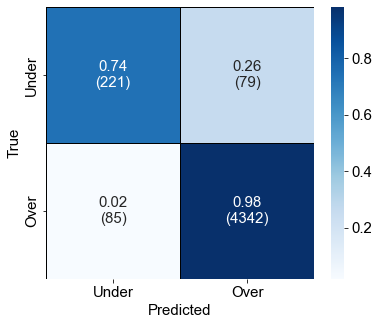

In [52]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


# 폰트 설정을 먼저 적용
plt.rc('font', family='Arial', size=15)        
plt.rc('axes', labelsize=15)   
plt.rc('xtick', labelsize=15)  
plt.rc('ytick', labelsize=15)

# 실제 Confusion Matrix (count 기준)
conf_matrix_counts = confusion_matrix(Answer_Data_0907_phase2_real, prediction_real, labels=[0, 1])

# Normalized Confusion Matrix
conf_matrix_normalized = confusion_matrix(Answer_Data_0907_phase2_real, prediction_real, labels=[0, 1], normalize='true')

# 주석(annotation)에 퍼센트 + count 추가
labels = np.array([
    [f"{conf_matrix_normalized[i, j]:.2f}\n({conf_matrix_counts[i, j]})" for j in range(2)]
    for i in range(2)
])

# 사용자 정의 레이블 (숫자 대신 'Under', 'Over' 사용)
class_names = ['Under', 'Over']

# 시각화
plt.figure(figsize=(6, 5))  # 그래프 크기 설정
sns.heatmap(conf_matrix_normalized, annot=labels, fmt="", cmap='Blues', linewidths=0.5, linecolor='black',
            xticklabels=class_names, yticklabels=class_names) 

plt.xlabel('Predicted')
plt.ylabel('True')
#plt.title('Normalized Confusion Matrix with Sample Counts')

#plt.savefig("TotalConfusionMatrix_arial.tiff", dpi=600, bbox_inches='tight')

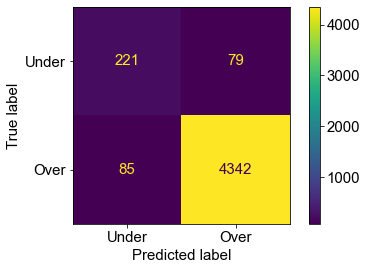

In [53]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

label = ['Under', 'Over']


confusion = confusion_matrix(Answer_Data_0907_phase2_real,prediction_real)

disp = ConfusionMatrixDisplay(confusion_matrix = confusion,
                              display_labels = label
                             )

plt.rc('font',family='arial', size=15)        # 기본 폰트 크기
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
disp.plot()

plt.tight_layout()  # 레이아웃 조정
#plt.savefig("TotalConfusionMatrix_arial.tiff", dpi=600, bbox_inches='tight')
plt.show()  # 플롯을 화면에 표시

In [54]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Answer_Data_0907_phase2_real,prediction_real)))

print('Micro Precision: {:.2f}'.format(precision_score(Answer_Data_0907_phase2_real,prediction_real, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Answer_Data_0907_phase2_real,prediction_real, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Answer_Data_0907_phase2_real,prediction_real, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Answer_Data_0907_phase2_real,prediction_real, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Answer_Data_0907_phase2_real,prediction_real, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Answer_Data_0907_phase2_real,prediction_real, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Answer_Data_0907_phase2_real,prediction_real, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Answer_Data_0907_phase2_real,prediction_real, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Answer_Data_0907_phase2_real,prediction_real, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Answer_Data_0907_phase2_real,prediction_real, target_names = ['Under','Over']))


Accuracy: 0.97

Micro Precision: 0.97
Micro Recall: 0.97
Micro F1-score: 0.97

Macro Precision: 0.85
Macro Recall: 0.86
Macro F1-score: 0.86

Weighted Precision: 0.97
Weighted Recall: 0.97
Weighted F1-score: 0.97

Classification Report

              precision    recall  f1-score   support

       Under       0.72      0.74      0.73       300
        Over       0.98      0.98      0.98      4427

    accuracy                           0.97      4727
   macro avg       0.85      0.86      0.86      4727
weighted avg       0.97      0.97      0.97      4727



In [55]:
fprs1,tprs1,thresholds1 = roc_curve(Answer_Data_0907_phase2_real, model.predict_proba(External_Test_X)[:,1])

In [56]:
print('Roc AUC Curve {}'.format(roc_auc_score(Answer_Data_0907_phase2_real,prediction_real)))

Roc AUC Curve 0.8587331526240494


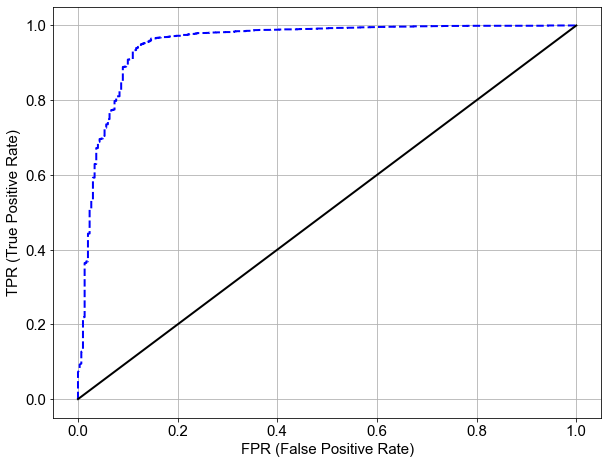

In [57]:
plt.figure(figsize=(9,7))
plt.plot(fprs1, tprs1, color='blue', linestyle='--', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
#plt.legend(loc='lower right')
plt.grid()

plt.rc('font',family='arial', size=25)        # 기본 폰트 크기
plt.rc('axes', labelsize=25)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=25)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=25)  # y축 눈금 폰트 크기
#plt.rc('legend', fontsize=20)  # 범례 폰트 크기
#plt.rc('figure', titlesize=25) # figure title 폰트 크기

# tight_layout을 사용하여 레이아웃 조정
plt.tight_layout()

#plt.savefig("TotalRocCurve25_arial.tiff", dpi=600, bbox_inches='tight')
# 플롯을 화면에 표시
plt.show()

In [58]:
import shap
explainer = shap.TreeExplainer(model,External_Test_X)
shap_values = explainer(External_Test_X,check_additivity=False )
shap_values2 = explainer.shap_values(External_Test_X,check_additivity=False )

 97%|=================== | 4588/4727 [00:18<00:00]       

In [59]:
shap_values.shape 

(4727, 24)

In [60]:
feature_names = ['Depth','Rate','SABP','DABP','SCVP','DCVP','SPPG','DPPG','ETpeaks','ITPpeaks','MAP','ABP_Area','CVP_Area','PPG_Area','Mean ABP','ABP Difference','CVP Difference','PPG Difference', 'ABP Time Difference','CVP Time Difference','PPG Time Difference','CPP1','CPP2','CPP3']

In [61]:
feature_names = ['Depth','Rate','Systolic arterial blood pressure','Diastolic  arterial blood pressure','Systolic central venous pressure','Diastolic central venous pressure','Systolic photoplethysmography','Diastolic photoplethysmography','End tidal carbon dioxide','Intrathoracic pressure peaks','Mean arterial pressure','Arterial blood pressure area','central venous pressure area','Photoplethysmography area','Arterial blood pressure mean value','Arterial blood pressure peak difference','Central venous pressure peak difference','Photoplethysmography peak difference', 'Arterial blood pressure peak time difference','Central venous pressure peak time difference','Photoplethysmography peak time difference','Coronary perfusion pressure 1','Coronary perfusion pressure 2','Coronary perfusion pressure 3']

In [62]:
#https://zephyrus1111.tistory.com/423

In [63]:
## 변수 중요도
for i in range(External_Test_X.shape[1]):
    feature_imp = np.mean(np.abs(shap_values2[:, i]))
    print(f'{feature_names[i]}의 중요도 :', feature_imp)
    

Depth의 중요도 : 0.0
Rate의 중요도 : 0.0
Systolic arterial blood pressure의 중요도 : 0.08919832787947717
Diastolic  arterial blood pressure의 중요도 : 0.979678183876263
Systolic central venous pressure의 중요도 : 0.1446813983774281
Diastolic central venous pressure의 중요도 : 0.4497441252551086
Systolic photoplethysmography의 중요도 : 0.3251514014504562
Diastolic photoplethysmography의 중요도 : 0.20299655907916034
End tidal carbon dioxide의 중요도 : 1.4543049486262396
Intrathoracic pressure peaks의 중요도 : 0.3240009966927791
Mean arterial pressure의 중요도 : 0.28320979641390176
Arterial blood pressure area의 중요도 : 0.8321335301647238
central venous pressure area의 중요도 : 0.04385361315802012
Photoplethysmography area의 중요도 : 0.17823793487806092
Arterial blood pressure mean value의 중요도 : 0.18973804113474838
Arterial blood pressure peak difference의 중요도 : 0.06947600776752483
Central venous pressure peak difference의 중요도 : 0.12250807966343073
Photoplethysmography peak difference의 중요도 : 0.15811217516302944
Arterial blood pressure peak time 

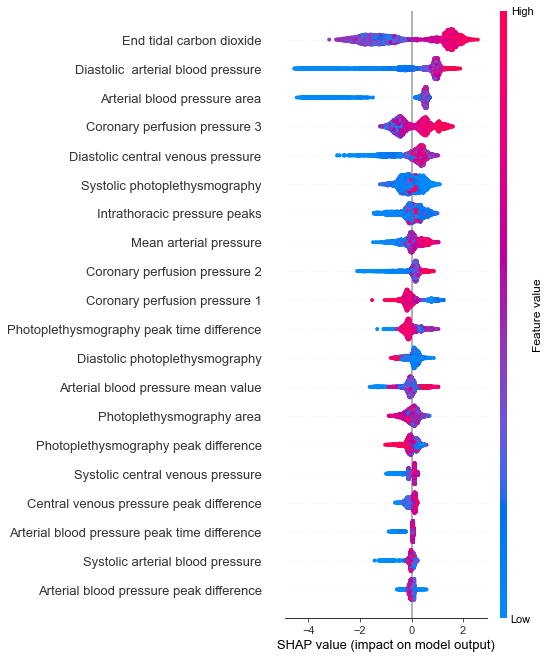

In [64]:
shap.summary_plot(shap_values,External_Test_X, show=False)
# 기본 폰트 크기 및 두께 설정
plt.rc('font', family='arial', size=18, weight='bold')        
plt.rc('axes', labelsize=18, labelweight='bold')   # x,y축 label 폰트 크기 및 두께
plt.rc('xtick', labelsize=18)  # x축 눈금 폰트 크기 및 두께
plt.rc('ytick', labelsize=18)  # y축 눈금 폰트 크기 및 두께
plt.rc('legend', fontsize=18, frameon=True, facecolor='white', edgecolor='black', shadow=True, fancybox=True, borderpad=1, borderaxespad=1, title_fontsize=25)  # 범례 폰트 크기 및 두께
plt.rc('figure', titlesize=18, titleweight='bold') # figure title 폰트 크기 및 두께

# tight_layout을 사용하여 레이아웃 조정
plt.tight_layout()

#plt.savefig("TotalSHAP_arial.tiff", dpi=600, bbox_inches='tight')
# 플롯을 화면에 표시
plt.show()

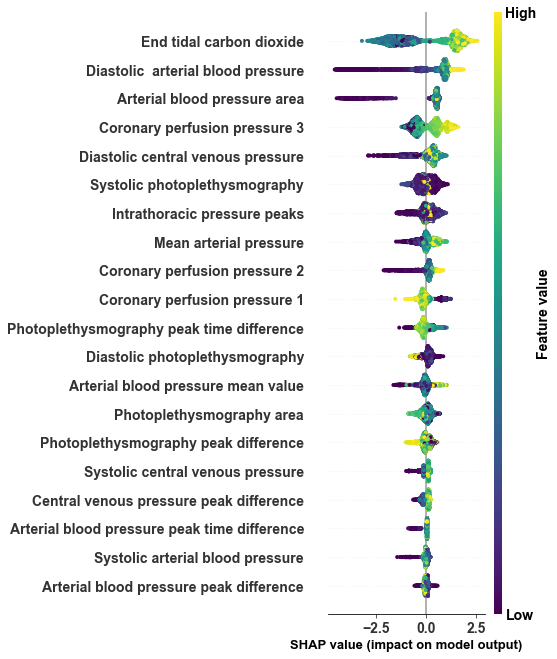

In [68]:

fig, ax = plt.subplots(figsize=(10, 6))  # 플롯 크기 설정


shap.summary_plot(shap_values, External_Test_X, show=False, plot_type="dot", cmap='viridis') 


ax.tick_params(axis='x', labelsize=14)  # x축 폰트 크기
ax.tick_params(axis='y', labelsize=14)  # y축 폰트 크기
#ax.set_xlabel("SHAP Value", fontsize=14, fontweight='bold')  # x축 제목
#cbar.ax.tick_params(labelsize=14)
#ax.set_ylabel("Features", fontsize=15, fontweight='bold')  # y축 제목


cbar = plt.gcf().axes[-1]  # SHAP이 생성한 컬러바를 가져옴


cbar.set_ylabel("Feature value", fontsize=14, fontweight="bold")  # 컬러바 제목 크기
cbar.tick_params(labelsize=14)  # "High", "Low" 글씨 크기 조정
#tight_layout 적용
plt.tight_layout()

#  플롯 저장 및 표시
plt.savefig("TotalSHAP_arial.tiff", dpi=600, bbox_inches='tight')
plt.show()

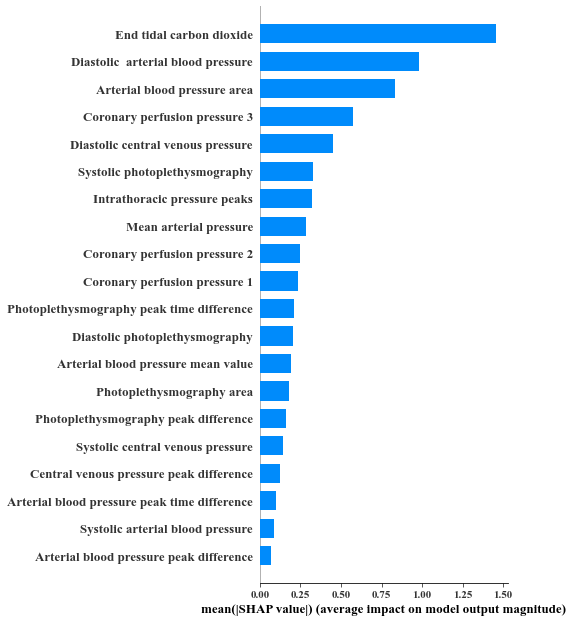

In [59]:
shap.summary_plot(shap_values,External_Test_X, plot_type='bar')

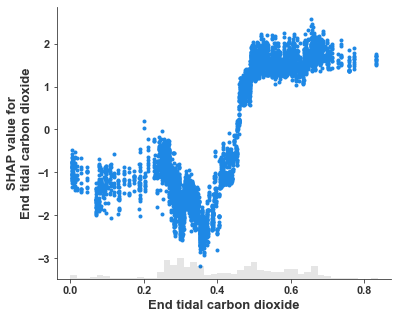

In [67]:
# Note that we are slicing off the column of the shap_values Explanation corresponding to the "Age" feature
shap.plots.scatter(shap_values[:,8], show=False)

# Set the font family to 'Times New Roman' for the plot
plt.rcParams['font.family'] = 'arial'

# Save the plot with the desired font settings
plt.savefig("ScatterSHAP_ET_arial.tiff", dpi=600)
plt.show()


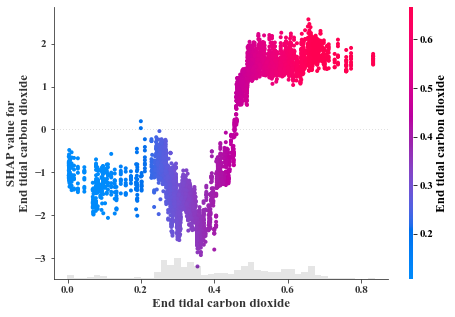

In [95]:
# Note that we are slicing off the column of the shap_values Explanation corresponding to the "Age" feature
shap.plots.scatter(shap_values[:,8], color=shap_values[:,8], show=False)

# Set the font family to 'Times New Roman' for the plot
plt.rcParams['font.family'] = 'Times New Roman'

# Save the plot with the desired font settings
plt.savefig("ScatterSHAP_ET_TimesNewRoman.tiff", dpi=500)
plt.show()


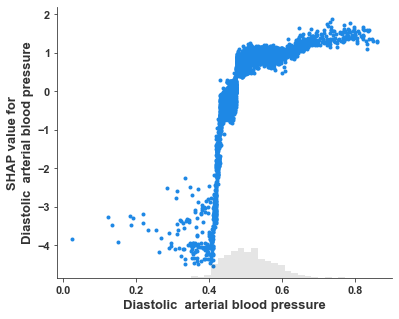

In [68]:
shap.plots.scatter(shap_values[:,3], show=False)

# Set the font family to 'Times New Roman' for the plot
plt.rcParams['font.family'] = 'arial'

# Save the plot with the desired font settings
plt.savefig("ScatterSHAP DABP_arial.tiff", dpi=600)
plt.show()

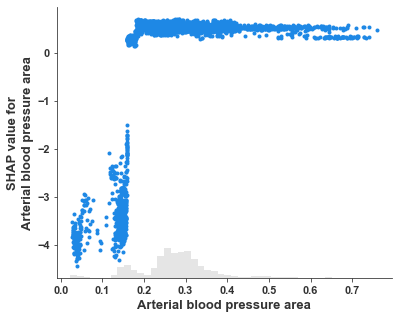

In [69]:
shap.plots.scatter(shap_values[:,11], show=False)

# Set the font family to 'Times New Roman' for the plot
plt.rcParams['font.family'] = 'arial'

# Save the plot with the desired font settings
plt.savefig("ScatterSHAP ABP Area_arial.tiff", dpi=600)
plt.show()

In [61]:
plt.hist(Etccc[:,8], bins=50)

plt.show()

NameError: name 'Etccc' is not defined

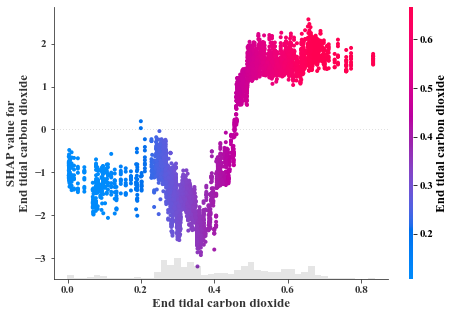

In [96]:
# Note that we are slicing off the column of the shap_values Explanation corresponding to the "Age" feature
shap.plots.scatter(shap_values[:,8], color=shap_values[:,8], show=False)

# Set the font family to 'Times New Roman' for the plot
plt.rcParams['font.family'] = 'Times New Roman'

# Save the plot with the desired font settings
plt.savefig("ScatterSHAP_ET_TimesNewRoman.tiff", dpi=500)
plt.show()

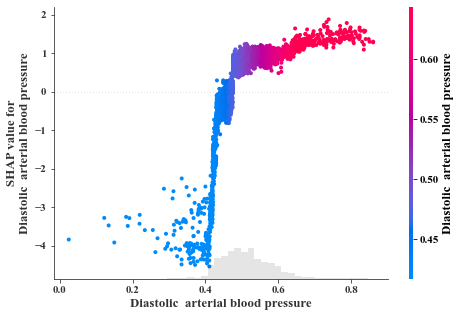

In [97]:
shap.plots.scatter(shap_values[:,3], color=shap_values[:,3], show=False)

# Set the font family to 'Times New Roman' for the plot
plt.rcParams['font.family'] = 'Times New Roman'

# Save the plot with the desired font settings
plt.savefig("ScatterSHAP DABP_TimesNewRoman.tiff", dpi=500)
plt.show()

In [ ]:
plt.hist(Etccc[:,3], bins=100)

plt.show()

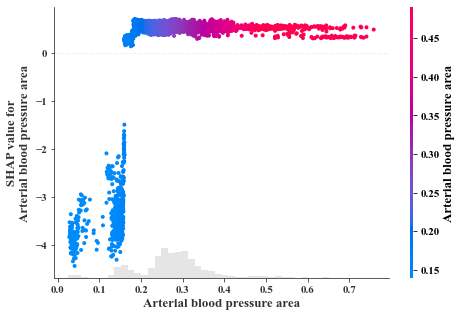

In [98]:
shap.plots.scatter(shap_values[:,11], color=shap_values[:,11], show=False)

# Set the font family to 'Times New Roman' for the plot
plt.rcParams['font.family'] = 'Times New Roman'

# Save the plot with the desired font settings
plt.savefig("ScatterSHAP ABP Area_TimesNewRoman.tiff", dpi=500)
plt.show()

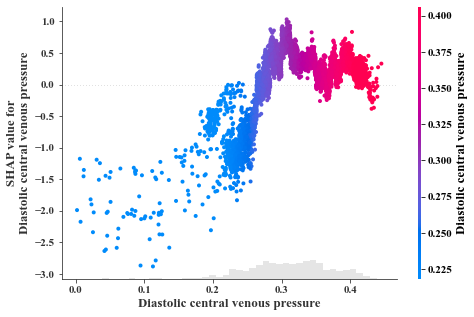

In [79]:
# Note that we are slicing off the column of the shap_values Explanation corresponding to the "Age" feature
shap.plots.scatter(shap_values[:,5], color=shap_values[:,5], show=False)
#plt.savefig("ScatterSHAP DCVP.tiff", dpi=300)

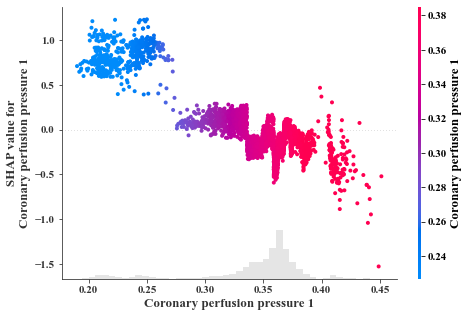

In [80]:
# Note that we are slicing off the column of the shap_values Explanation corresponding to the "Age" feature
shap.plots.scatter(shap_values[:,21], color=shap_values[:,21], show=False)
#plt.savefig("ScatterSHAP CPP1.tiff", dpi=300)

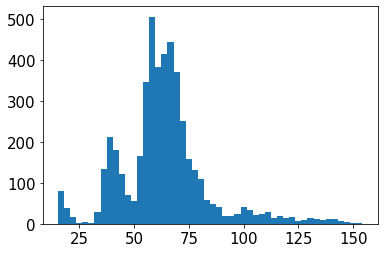

In [74]:
plt.hist(Etccc[:,11], bins=50)

plt.show()

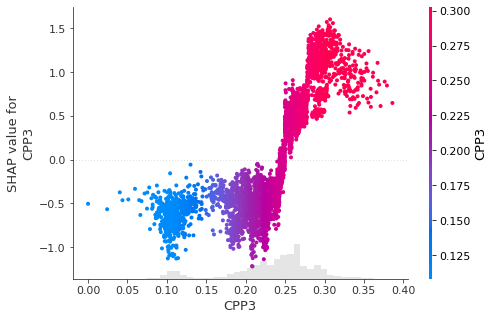

In [75]:
shap.plots.scatter(shap_values[:,23], color=shap_values[:,23], show=False)
#plt.savefig("ScatterSHAP CPP3.tiff", dpi=300)

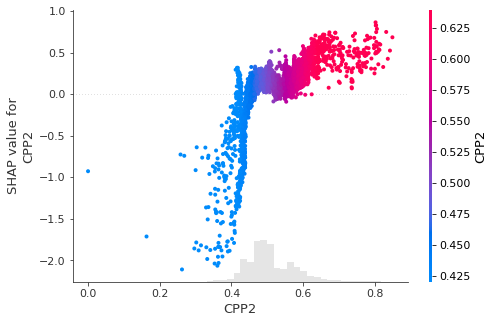

In [76]:
# Note that we are slicing off the column of the shap_values Explanation corresponding to the "Age" feature
shap.plots.scatter(shap_values[:,22], color=shap_values[:,22], show=False)
#plt.savefig("ScatterSHAP CPP2.tiff", dpi=300)

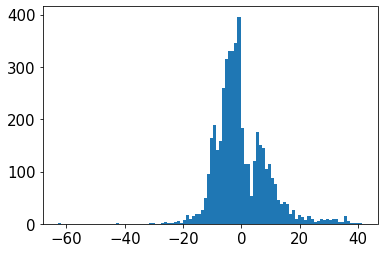

In [77]:
plt.hist(Etccc[:,22], bins=100)

plt.show()

In [ ]:
# Note that we are slicing off the column of the shap_values Explanation corresponding to the "Age" feature
shap.plots.scatter(shap_values[:,21], color=shap_values[:,21], show=False)
#plt.savefig("ScatterSHAP CPP1.tiff", dpi=300)

In [ ]:
ETmax
0.0034 = 5.15407828667294
0.83176569577272 = 42.4294563097724

DABP
ABP Diastolic: 
Max=  43.148435025594  = 0.85
Min =  -56.9655177067553 = 0.02

In [ ]:
type(Lucas)

In [69]:
Etccc = np.array(Lucas)

In [ ]:
Etccc[:,8]
bar plot으로 ET threshold 값을 알 수 0 

In [ ]:
shap_values.shape

In [ ]:
shap_values

In [ ]:
shap_values[:,7].shape

In [ ]:
max(DABP_Feature)